In [90]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from scipy.signal import argrelextrema

In [60]:
def get_stock_data(tickers, interval='1d', period='1y'):
    """
    used for fetching historical stock data.
        ticker: name of the fund
        interval: time interval for fetching data ('1d', '1h', '1m', etc.)
        period: period to fetch data for ('1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max')
    """
    data = {}
    for ticker in tickers:
        stock = yf.Ticker(ticker)
        data[ticker] = stock.history(interval=interval, period=period)
    return data

In [61]:
def find_extrema(data, column='Close', order=5):
    """
    Find local and global extrema of stock prices.
    """
    prices = data[column]
    local_maxima = argrelextrema(prices.values, np.greater, order=order)[0]
    local_minima = argrelextrema(prices.values, np.less, order=order)[0]

    global_max = prices.idxmax()
    global_min = prices.idxmin()
    
    return {
        'local_maxima': local_maxima,
        'local_minima': local_minima,
        'count_maxima': len(local_maxima), # to analyze the number of maxima
        'count_minima': len(local_minima), # to analyze the number of minima
        'global_max': (global_max, prices[global_max]),
        'global_min': (global_min, prices[global_min]),
    }

In [62]:
def plot_stock_data(data, extrema, ticker, column='Close'):
    """
    Plot stock price data with extrema.
    Args:
        data (pandas.DataFrame): Stock data.
        extrema (dict): Dictionary of extrema indices and values.
        ticker (str): Stock ticker symbol.
        column (str): Column to plot.
    """
    plt.figure(figsize=(12, 6))
    plt.plot(data[column], label=f'{ticker} Close Price', color='xkcd:lavender')

    # map extrema indices to actual dates
    dates = data.index
    local_max_dates = dates[extrema['local_maxima']]
    local_min_dates = dates[extrema['local_minima']]

    global_max, max_value = extrema['global_max']
    global_min, min_value = extrema['global_min']
    
    # Plot local maxima and minima
    plt.scatter(local_max_dates, data[column].iloc[extrema['local_maxima']],
                color='xkcd:magenta', label='Local Maxima', marker='^', s=100)
    plt.scatter(local_min_dates, data[column].iloc[extrema['local_minima']],
                color='purple', label='Local Minima', marker='v', s=100)
    plt.scatter(global_max, max_value,
                color='orchid', label='Global Max', s=200)
    plt.scatter(global_min, min_value,
                color='indigo', label='Global Min', s=200)
    plt.text(global_max, max_value, f'  {max_value:.2f}',
                color='orchid')
    plt.text(global_min, min_value, f'  {min_value:.2f}',
                color='indigo', fontsize=10)

    plt.title(f'{ticker} Stock Price with Global and Local Extrema')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid()
    plt.show()

In [63]:
def analyze_stocks(tickers, interval='1d', period='1y', order=5):
    """
    Analyze multiple stocks for local minima and maxima.
    """
    # fetching the stock data of multiple stocks
    stock_data = get_stock_data(tickers, interval, period)
    
    # analyze each stock
    results = {}
    for ticker, data in stock_data.items():
        extrema = find_extrema(data, order=order)
        extrema['overall_score'] = extrema['count_maxima'] + extrema['count_minima']
        results[ticker] = extrema
        print(f"\n{ticker}:")
        print(f"Local Maxima Count: {extrema['count_maxima']}")
        print(f"Local Minima Count: {extrema['count_minima']}")
        
        plot_stock_data(data, extrema, ticker)
    
    # comparison of local extrema
    comparison_df = pd.DataFrame.from_dict(
        {ticker: {'Local Maxima': results[ticker]['count_maxima'],
                  'Local Minima': results[ticker]['count_minima'],
                  'Overall Score': results[ticker]['overall_score']}
         for ticker in tickers},
        orient='index'
    )
    print("\nComparison of Local Extrema and Overall Scores:")
    print(comparison_df)

    # sort the dataframe by Overall Score in descending order
    comparison_df = comparison_df.sort_values(by='Overall Score', ascending=False)
    
    ax = comparison_df[['Local Maxima', 'Local Minima', 'Overall Score']].plot(
        kind='bar', figsize=(12, 6), width=0.8, color=['purple', 'orchid', 'xkcd:magenta']
    )
    
    plt.title('Comparison of Local Extrema and Overall Scores for Stocks')
    plt.xlabel('Stocks')
    plt.ylabel('Count')
    plt.grid(axis='y')
    plt.legend(loc='upper right')
    plt.show()


AAPL:
Local Maxima Count: 13
Local Minima Count: 15


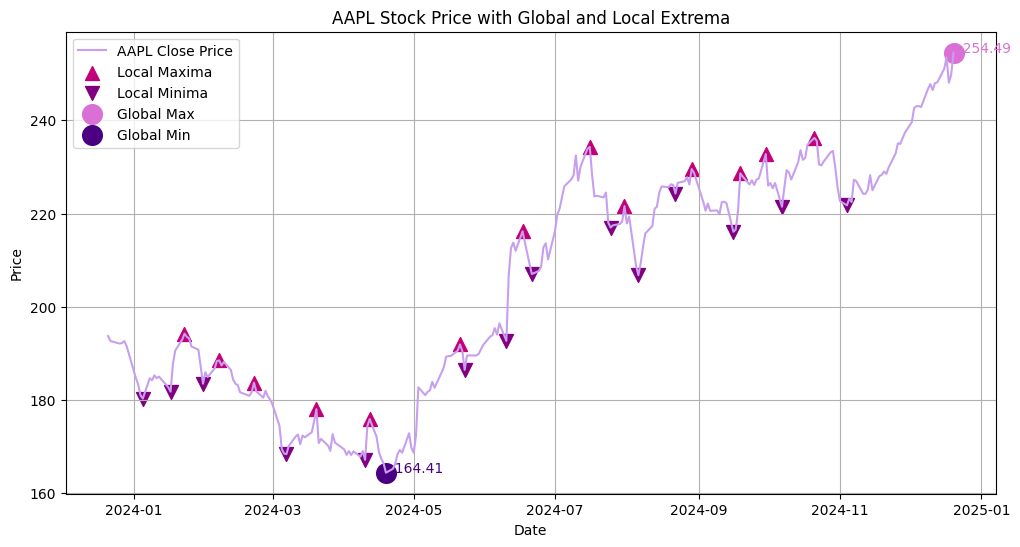


MSFT:
Local Maxima Count: 14
Local Minima Count: 13


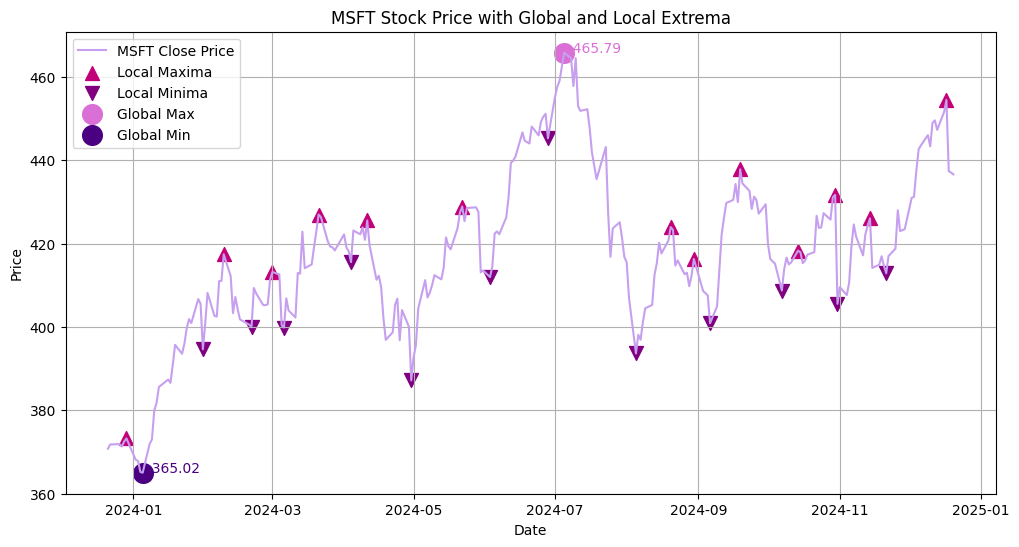


GOOGL:
Local Maxima Count: 15
Local Minima Count: 13


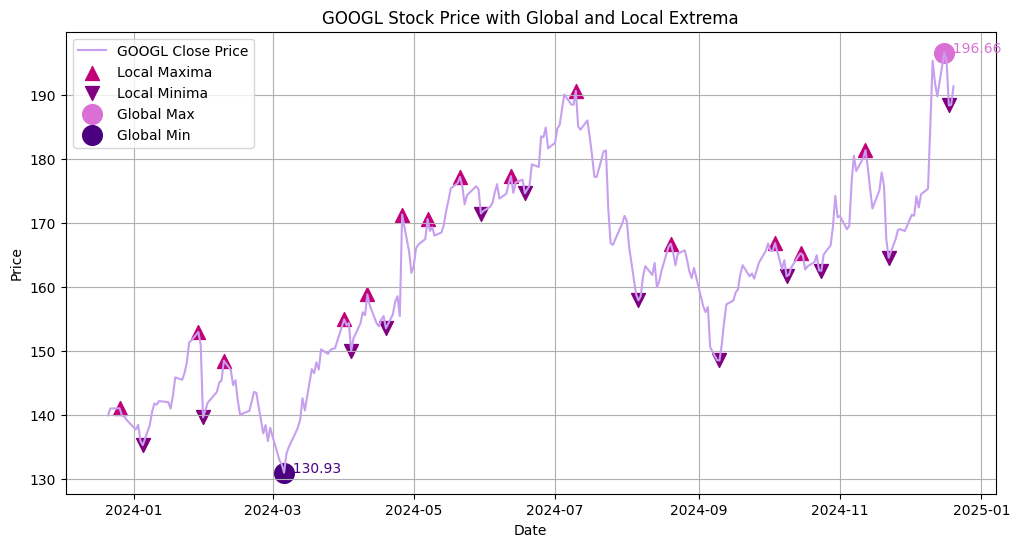


TSLA:
Local Maxima Count: 15
Local Minima Count: 18


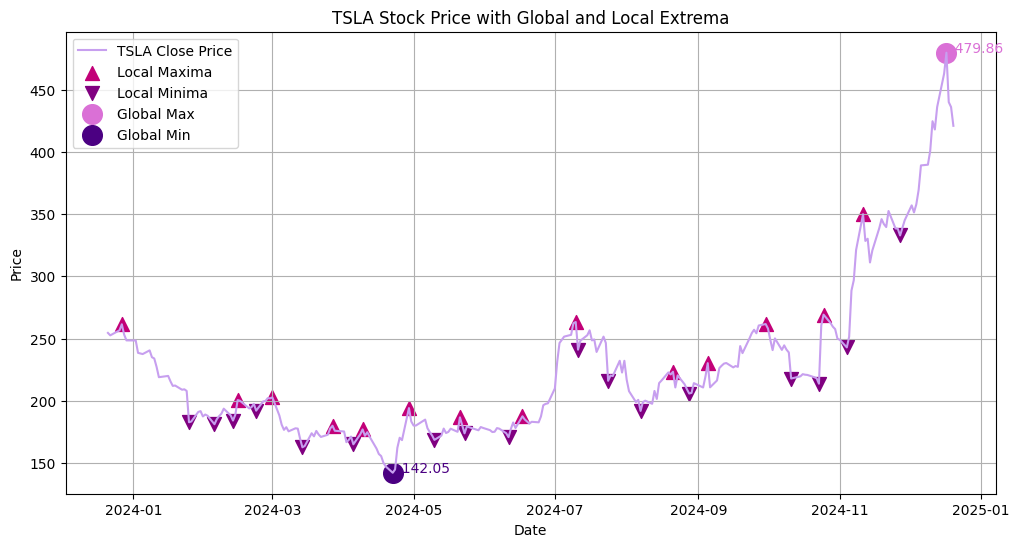


NVDA:
Local Maxima Count: 13
Local Minima Count: 14


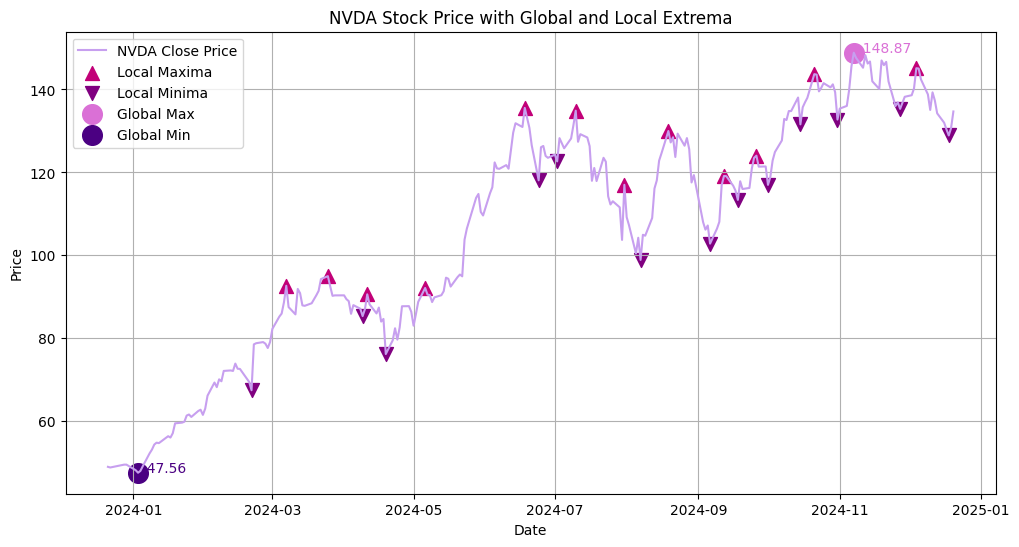


AMD:
Local Maxima Count: 15
Local Minima Count: 17


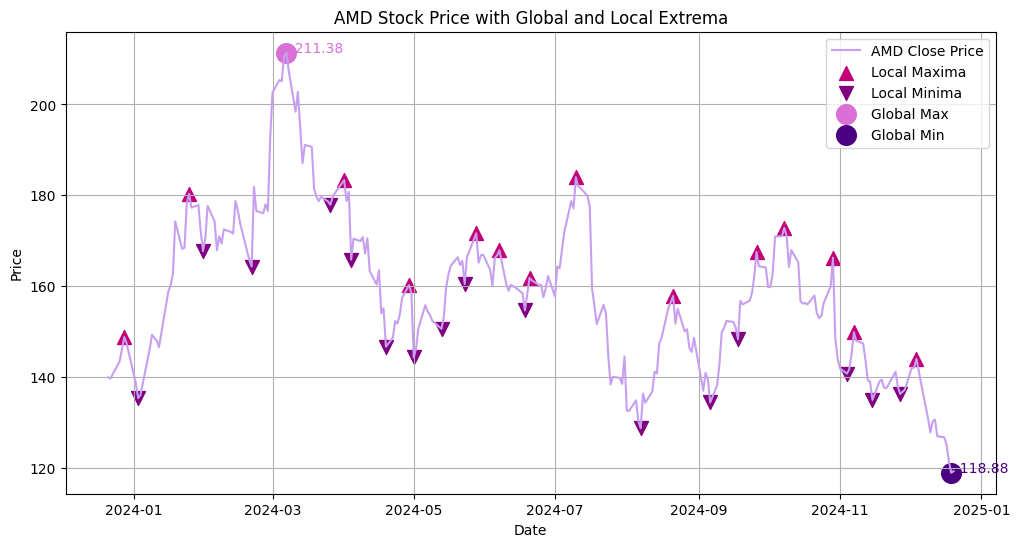


AMZN:
Local Maxima Count: 12
Local Minima Count: 15


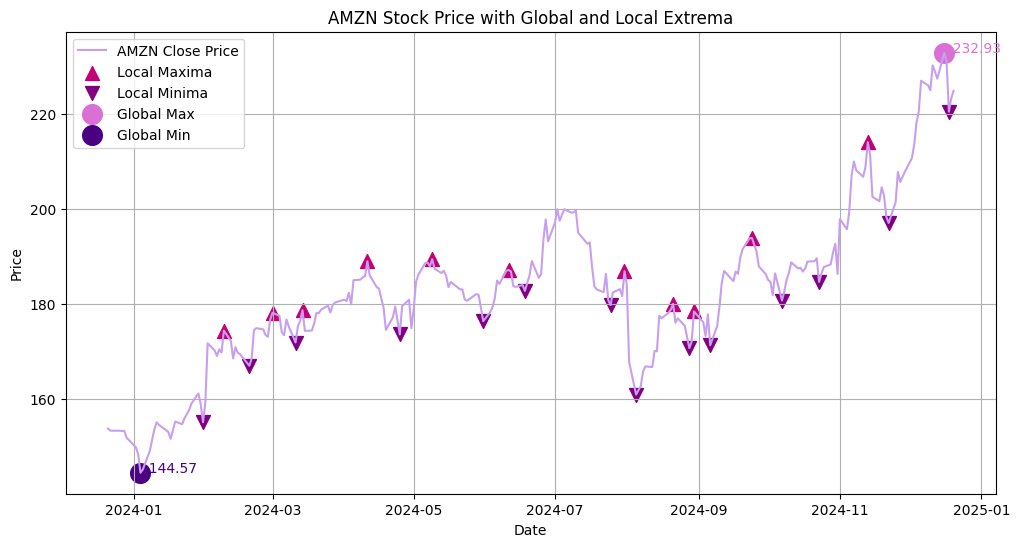


NFLX:
Local Maxima Count: 16
Local Minima Count: 14


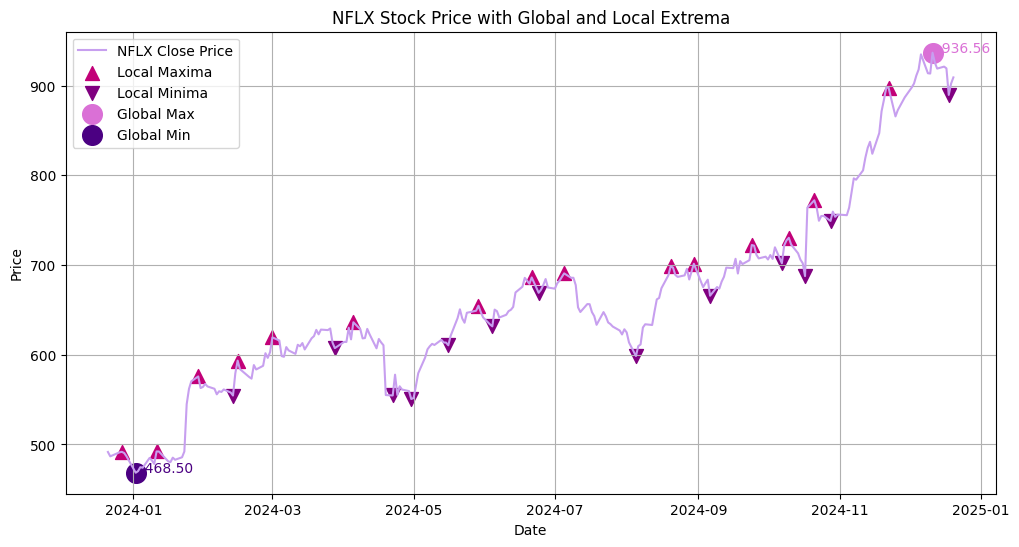


INTC:
Local Maxima Count: 17
Local Minima Count: 16


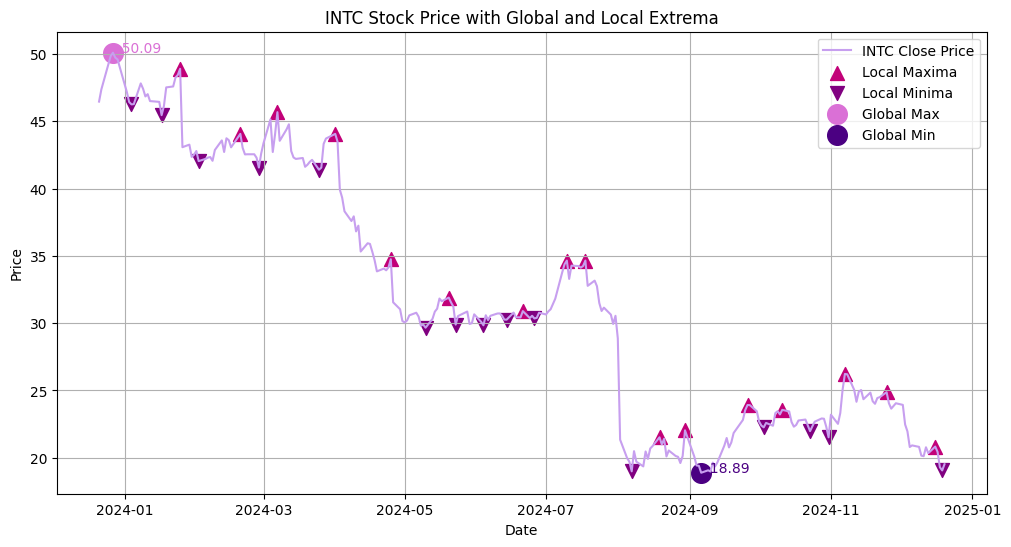


XOM:
Local Maxima Count: 17
Local Minima Count: 15


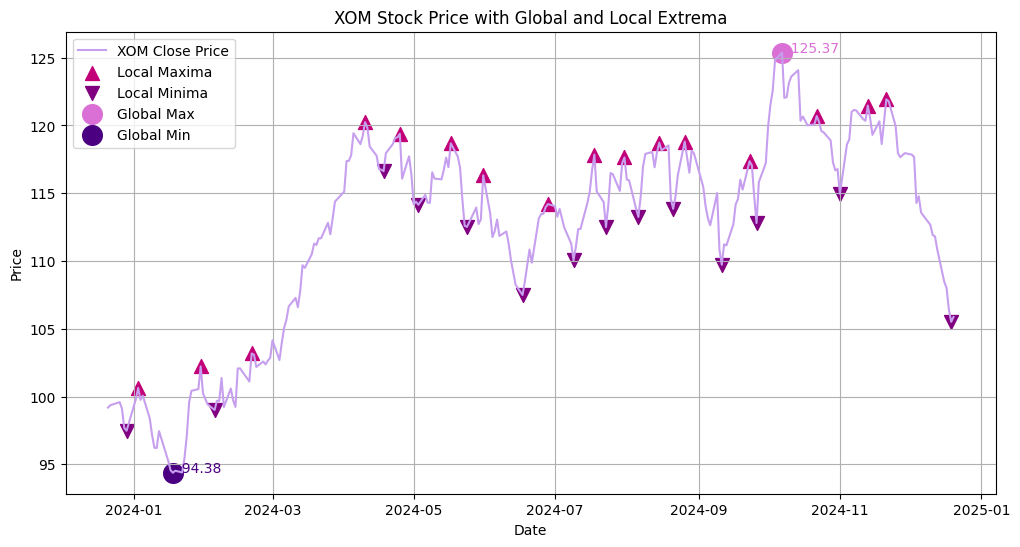


CVX:
Local Maxima Count: 16
Local Minima Count: 15


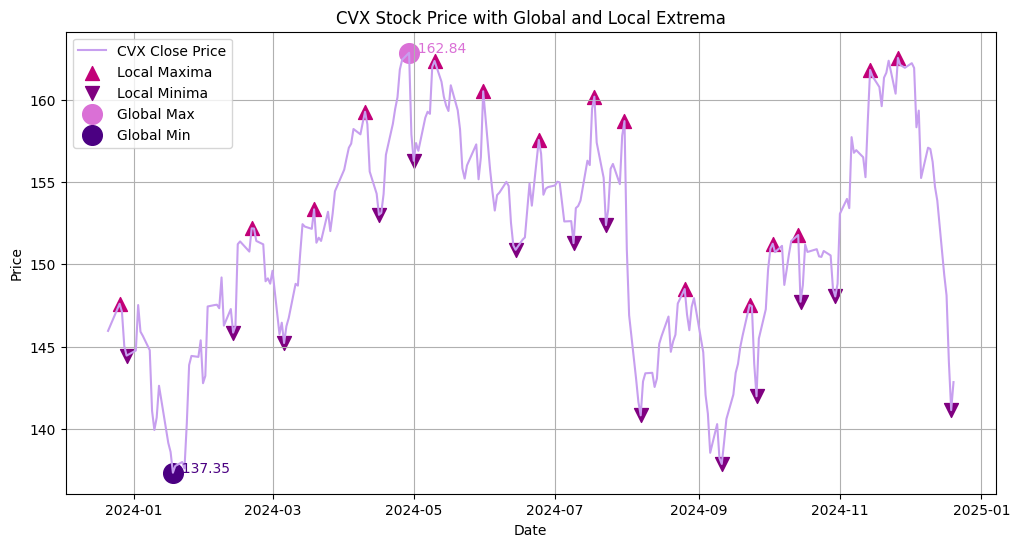


OXY:
Local Maxima Count: 15
Local Minima Count: 17


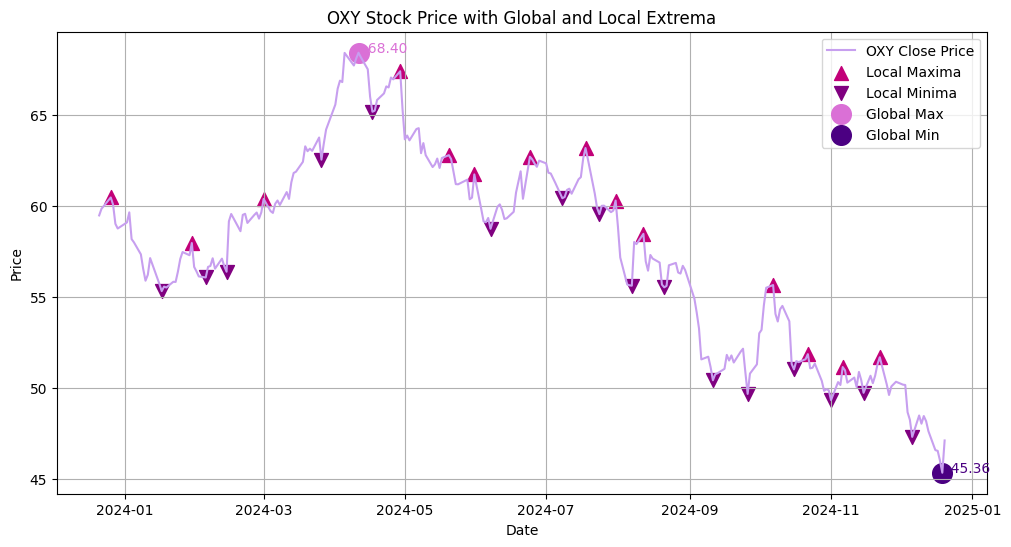


MRNA:
Local Maxima Count: 15
Local Minima Count: 14


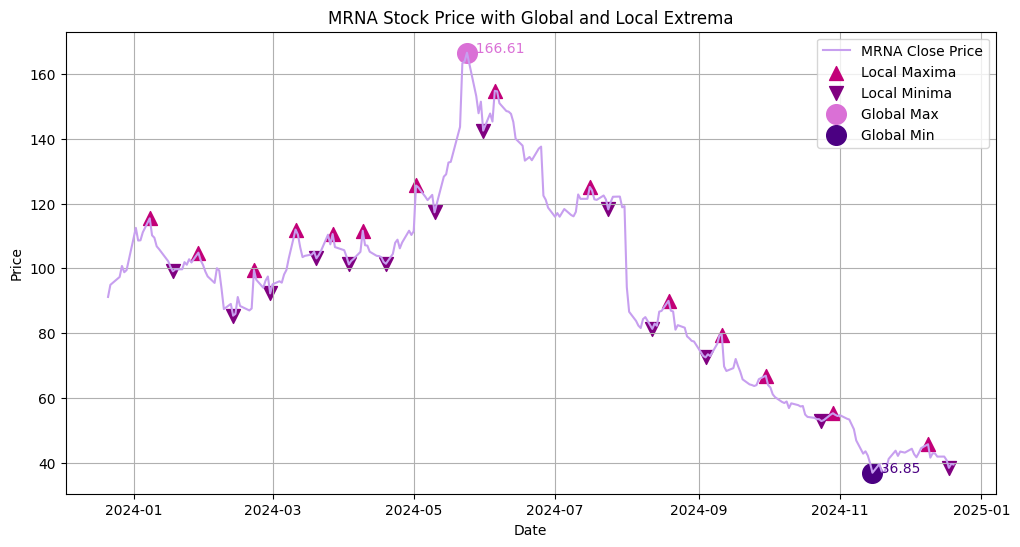


PFE:
Local Maxima Count: 17
Local Minima Count: 11


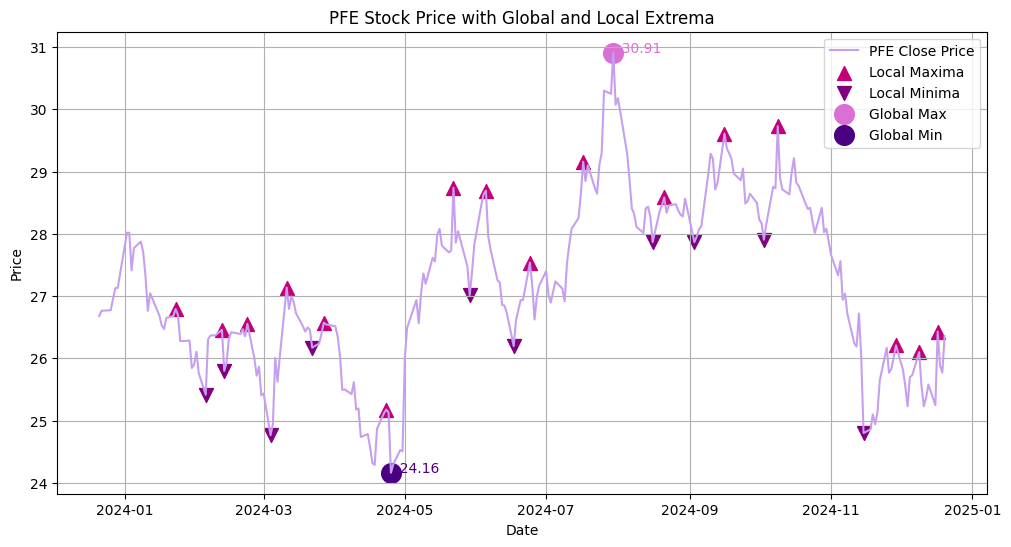


BIIB:
Local Maxima Count: 17
Local Minima Count: 12


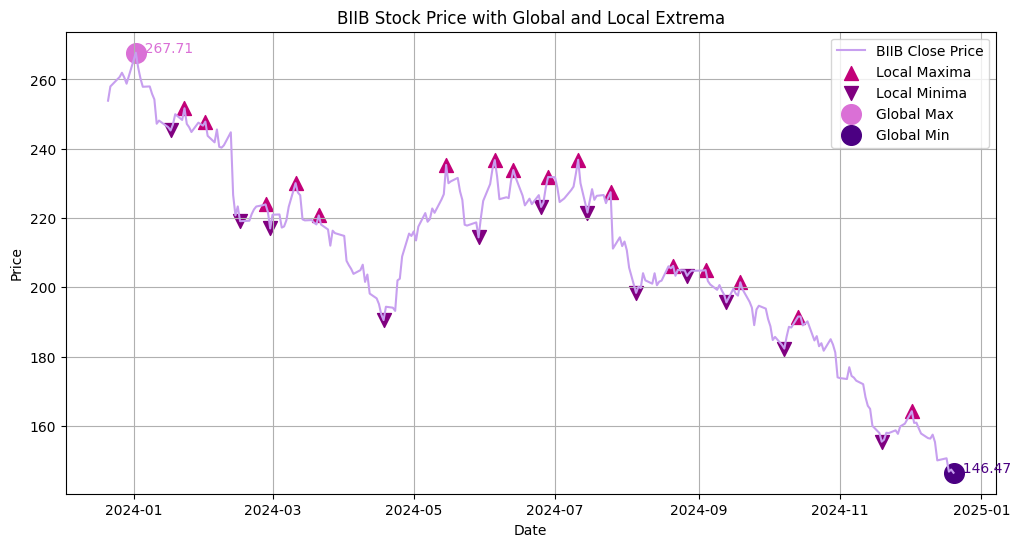


GME:
Local Maxima Count: 15
Local Minima Count: 16


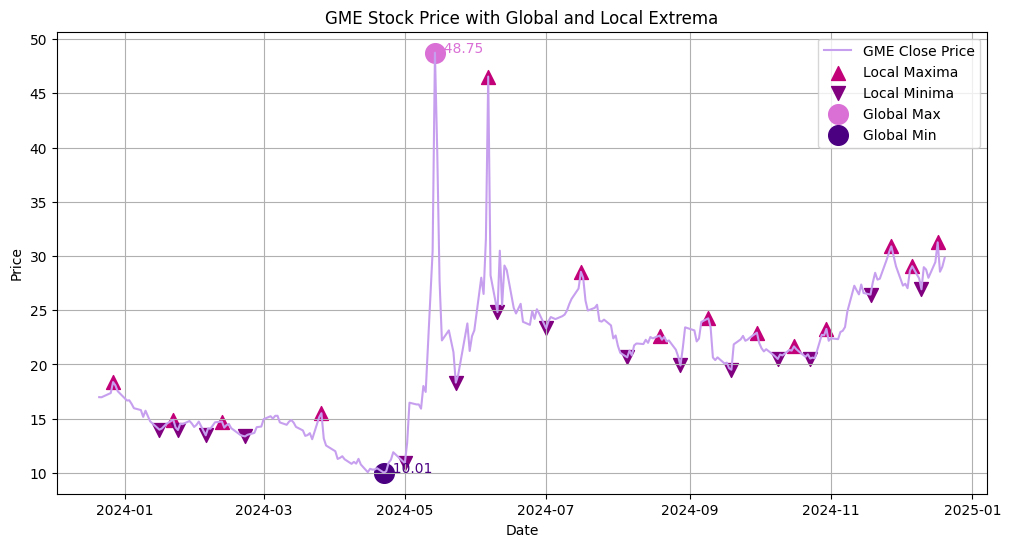


AMC:
Local Maxima Count: 17
Local Minima Count: 15


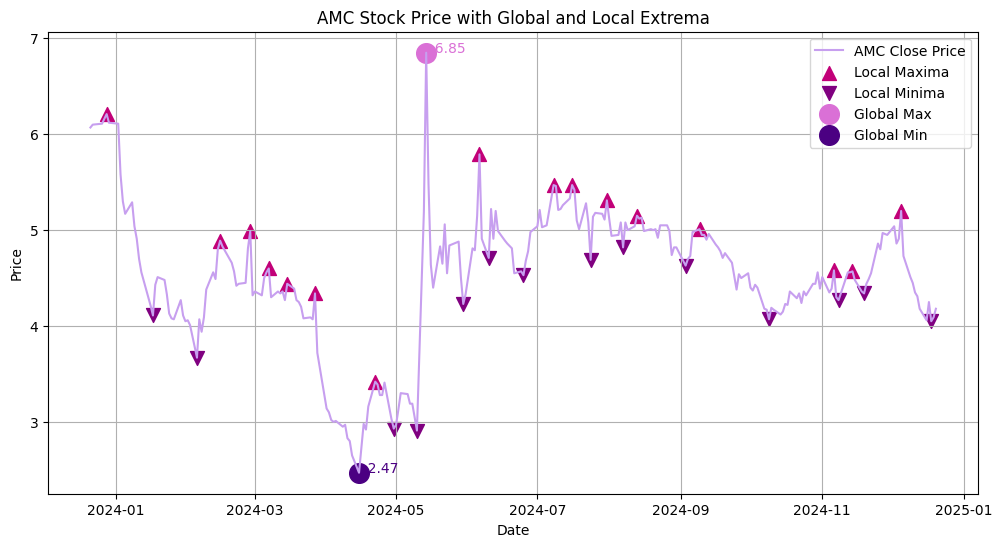


BB:
Local Maxima Count: 16
Local Minima Count: 13


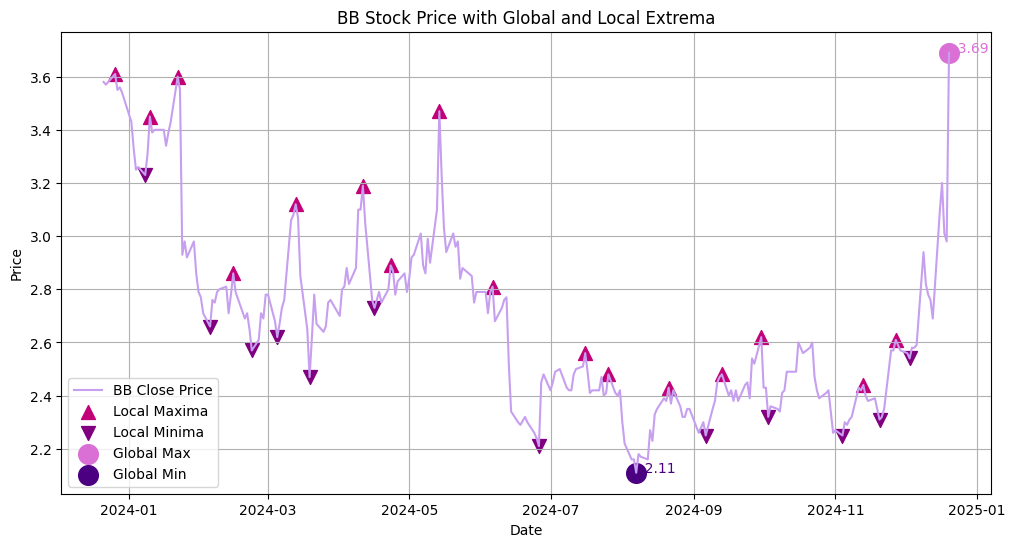


PLUG:
Local Maxima Count: 14
Local Minima Count: 12


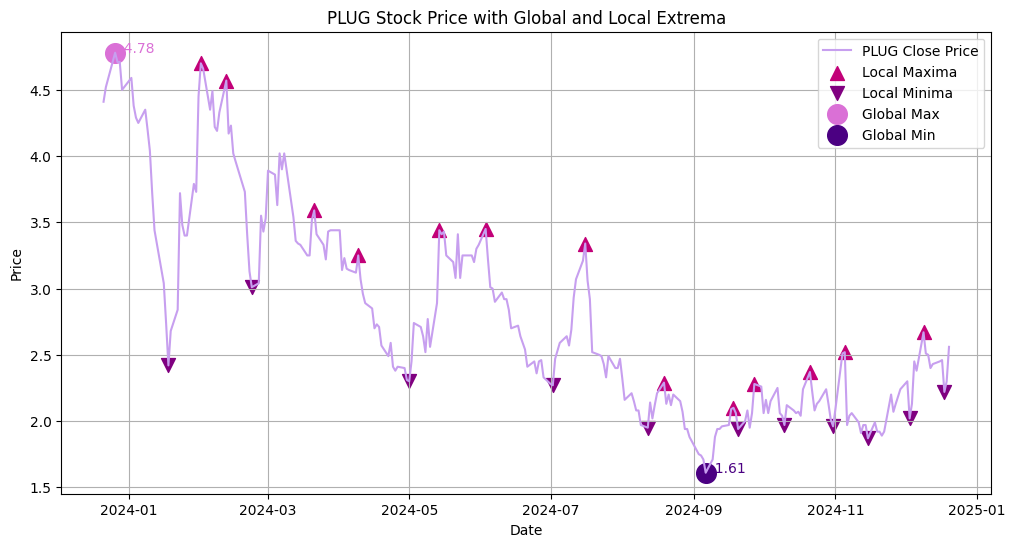


PLTR:
Local Maxima Count: 17
Local Minima Count: 14


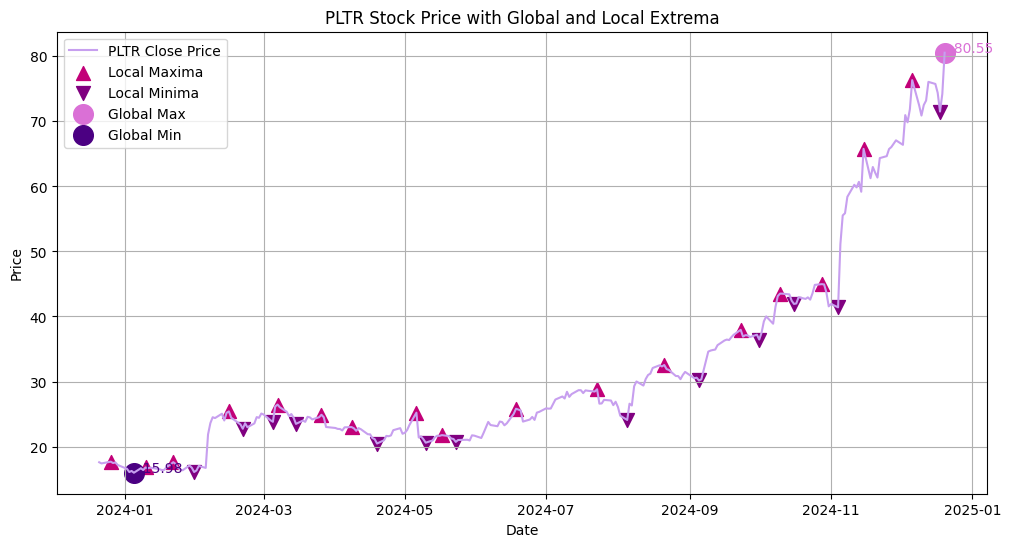


ROKU:
Local Maxima Count: 15
Local Minima Count: 19


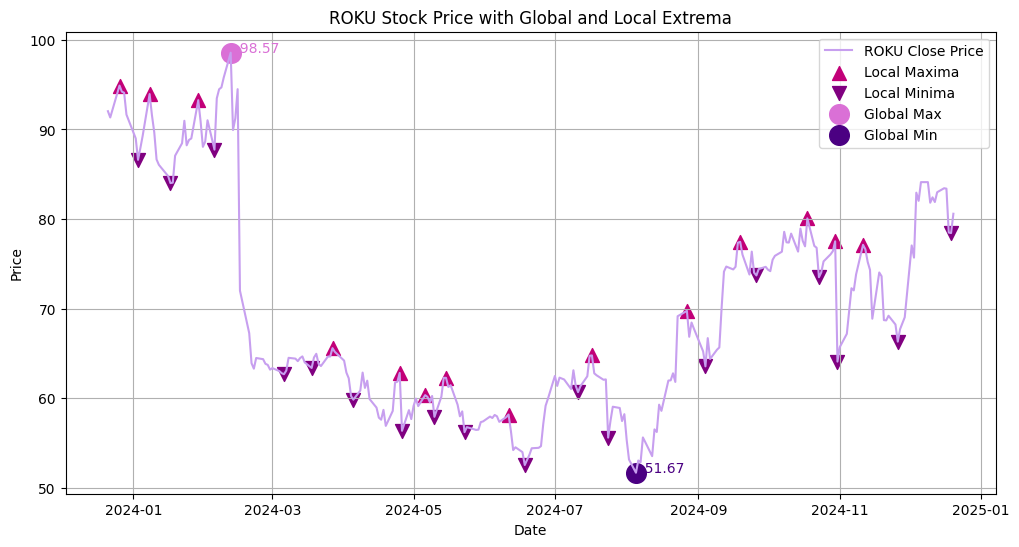


ZM:
Local Maxima Count: 18
Local Minima Count: 18


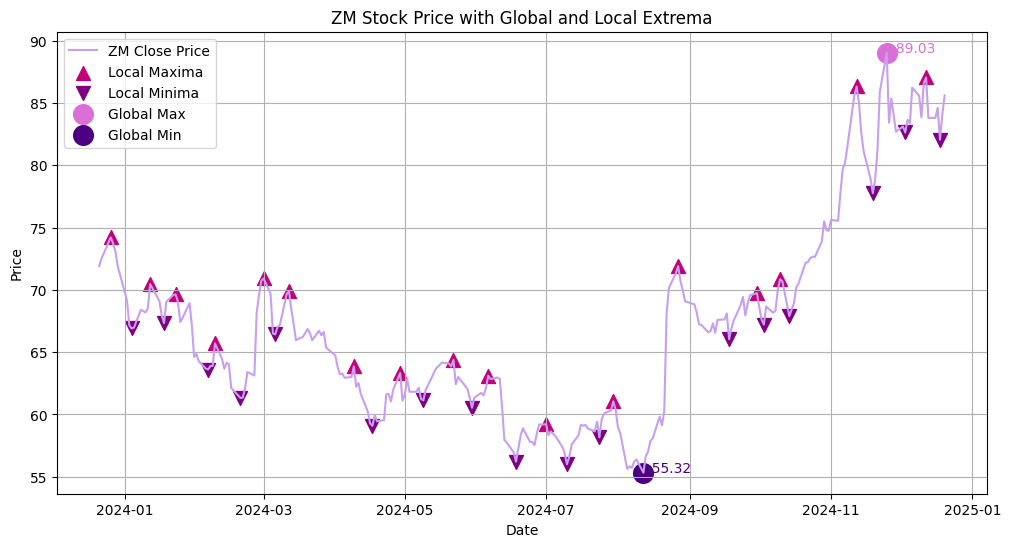


SQ:
Local Maxima Count: 18
Local Minima Count: 18


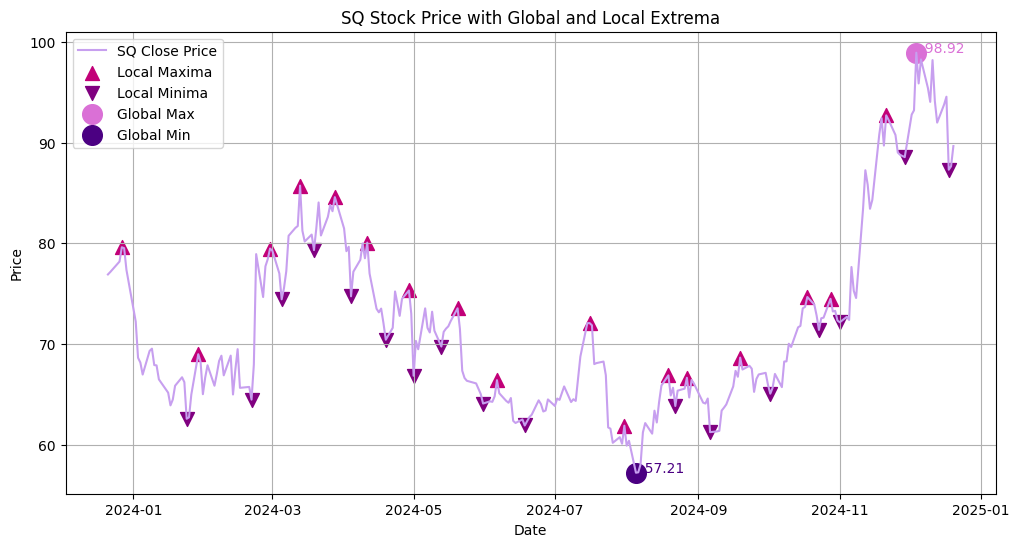


PYPL:
Local Maxima Count: 19
Local Minima Count: 20


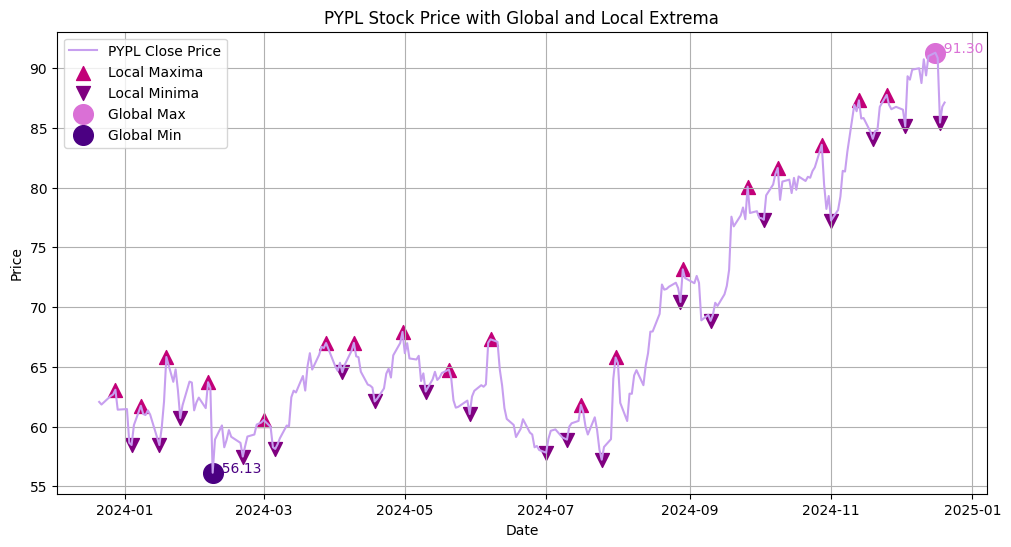


UBER:
Local Maxima Count: 14
Local Minima Count: 11


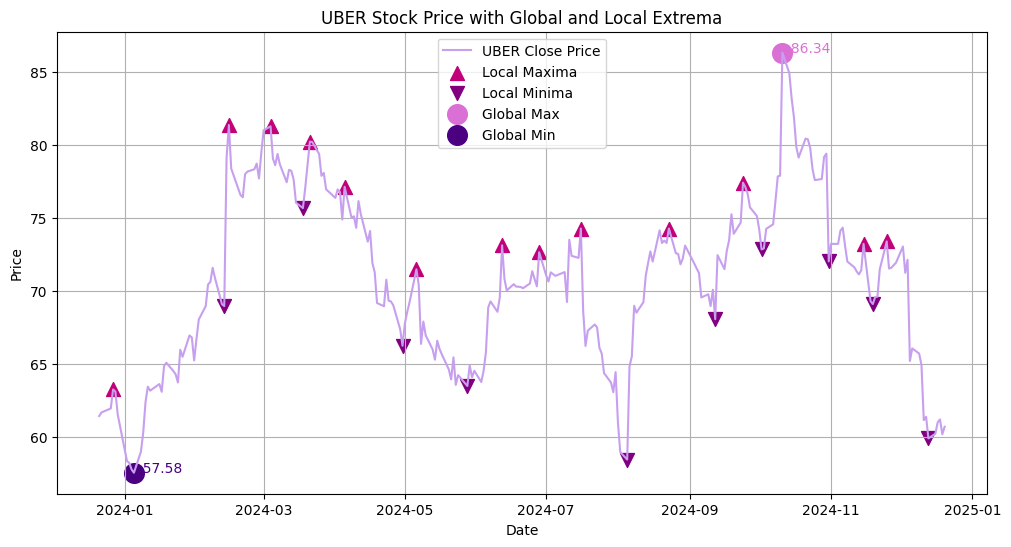


LYFT:
Local Maxima Count: 15
Local Minima Count: 15


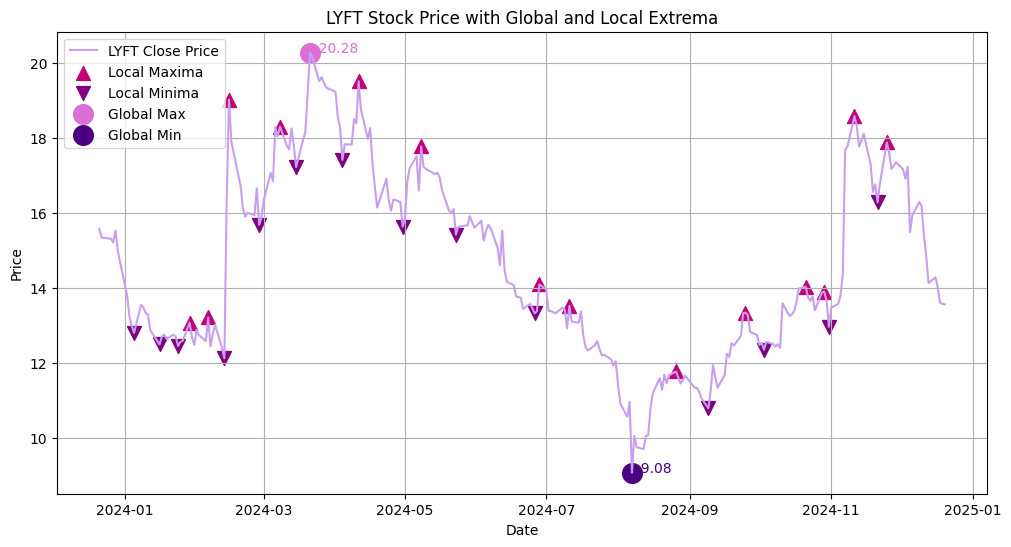


T:
Local Maxima Count: 16
Local Minima Count: 17


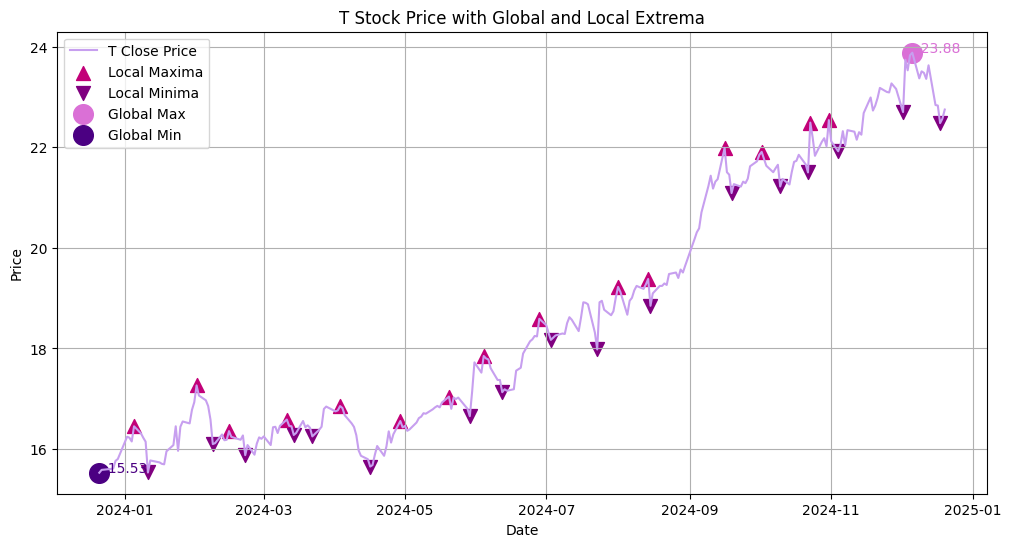


VZ:
Local Maxima Count: 18
Local Minima Count: 16


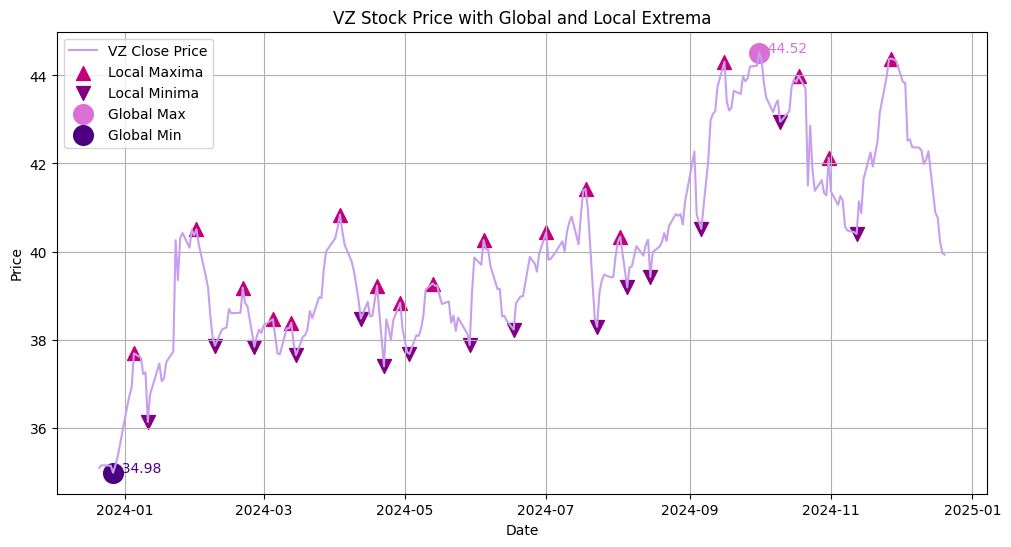


TMUS:
Local Maxima Count: 13
Local Minima Count: 14


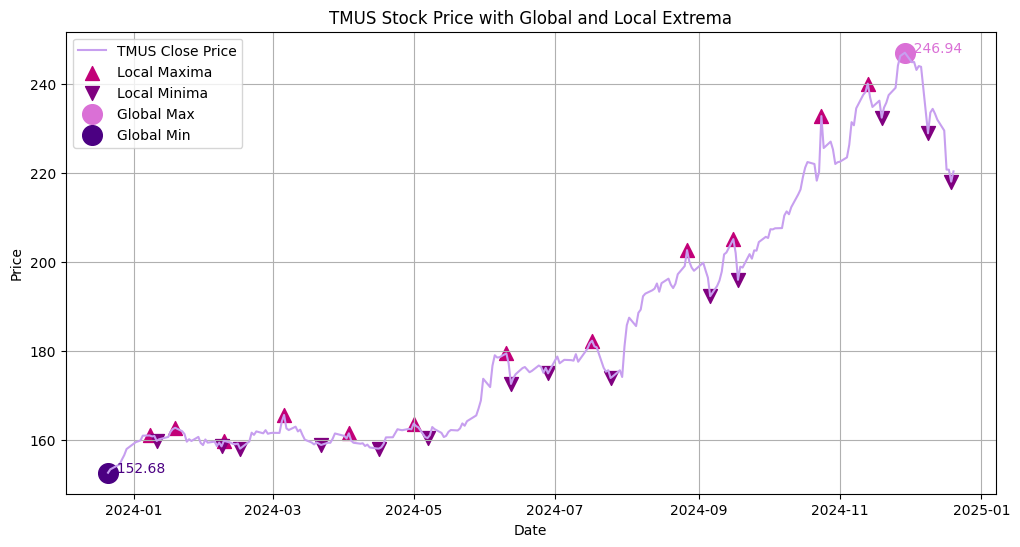


S:
Local Maxima Count: 15
Local Minima Count: 20


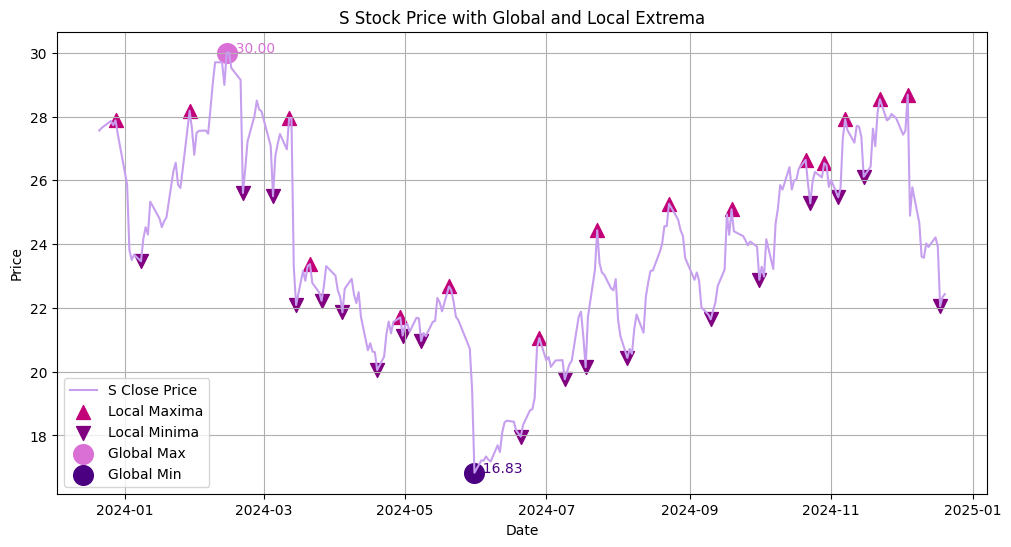


TM:
Local Maxima Count: 13
Local Minima Count: 14


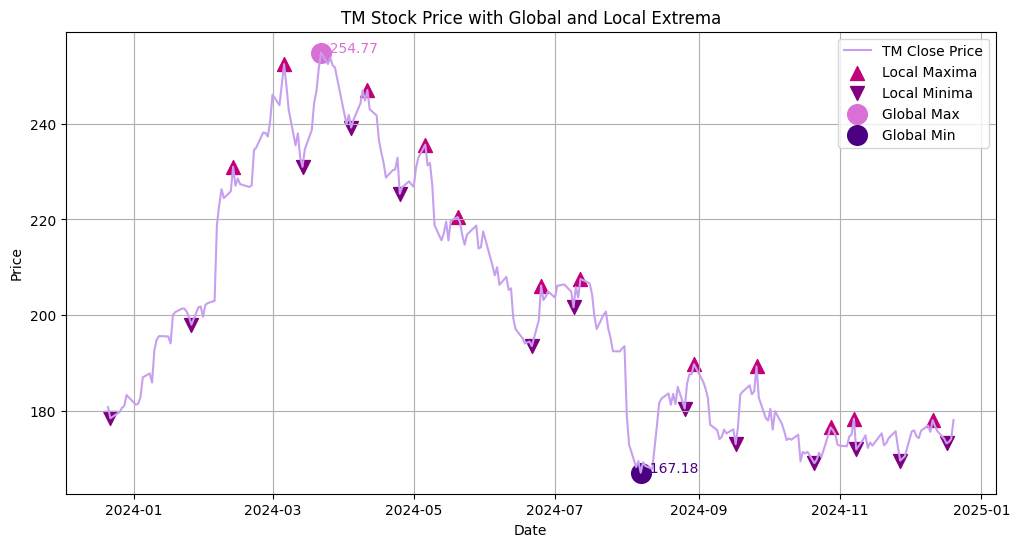


F:
Local Maxima Count: 13
Local Minima Count: 16


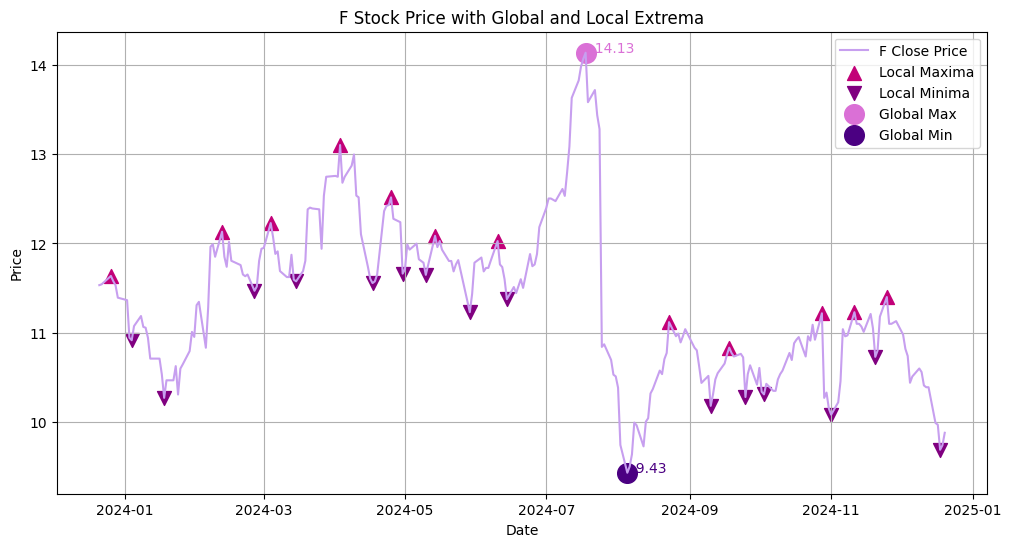


GM:
Local Maxima Count: 16
Local Minima Count: 14


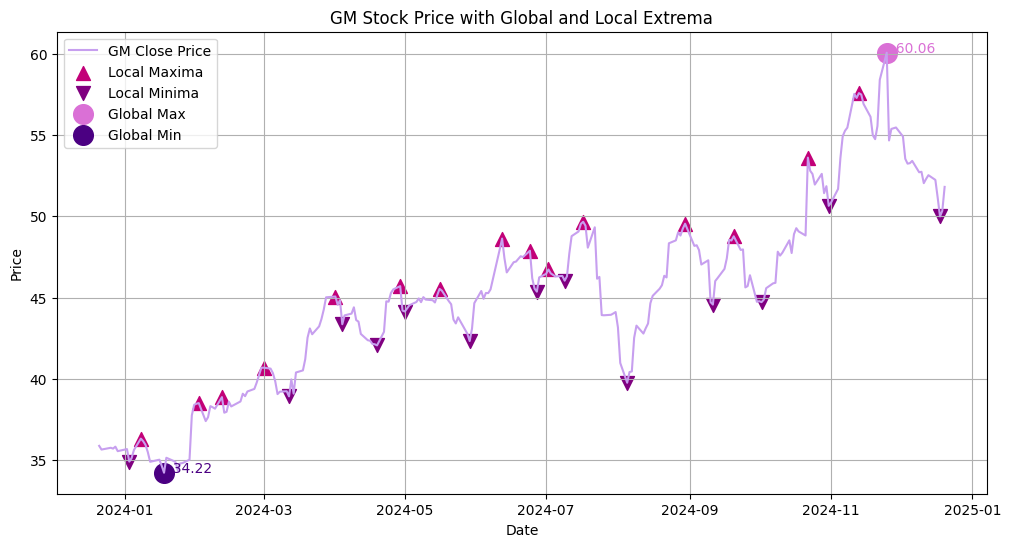


NIO:
Local Maxima Count: 17
Local Minima Count: 16


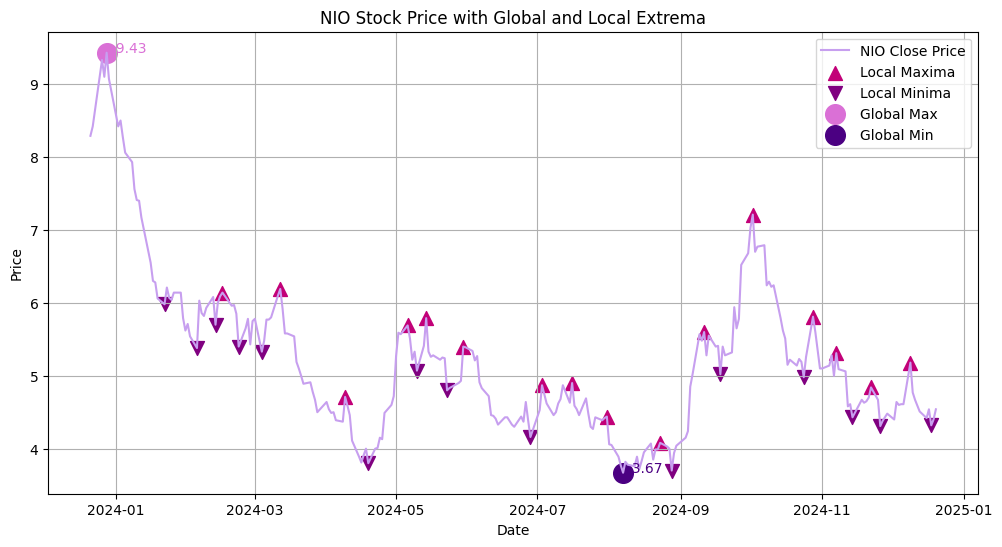


LI:
Local Maxima Count: 15
Local Minima Count: 16


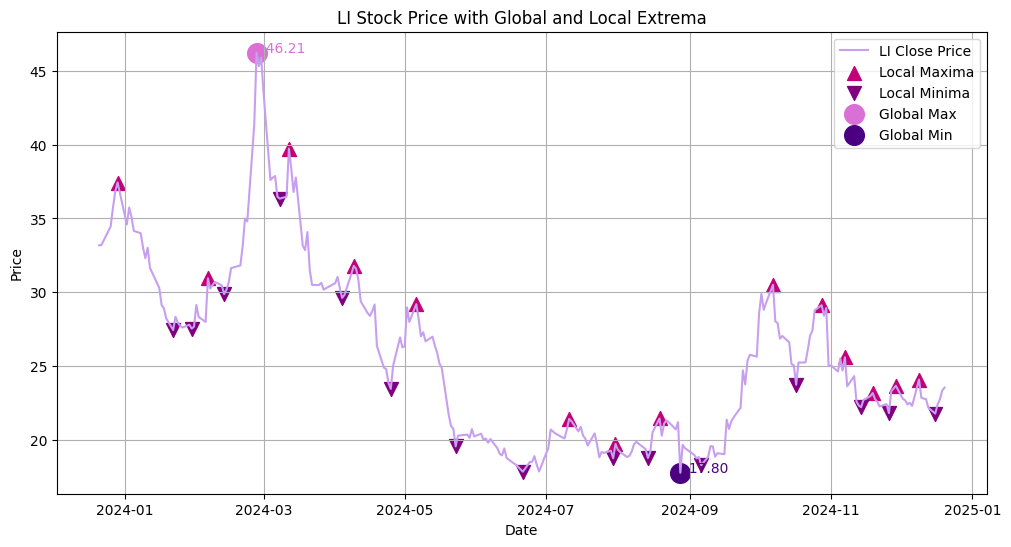


XPEV:
Local Maxima Count: 13
Local Minima Count: 12


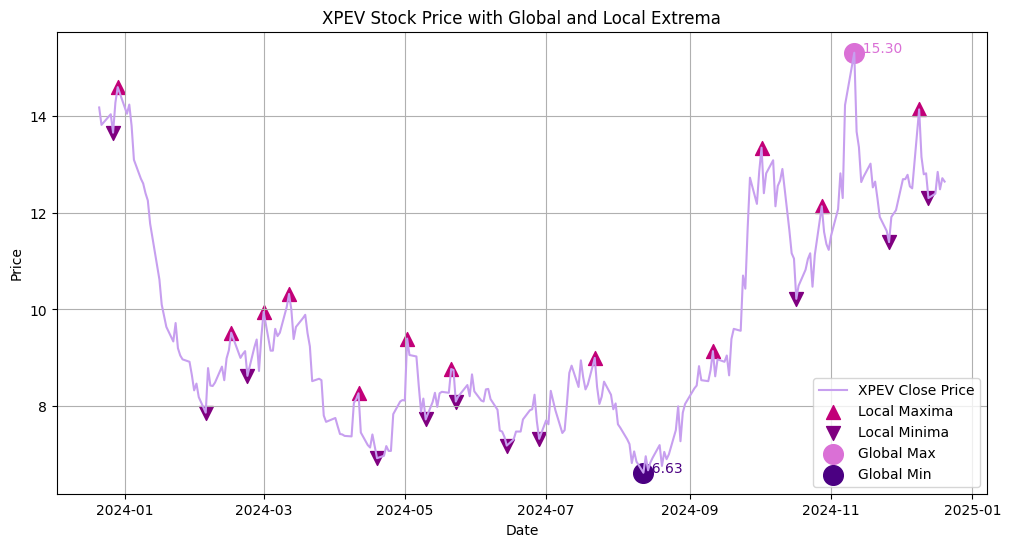


PBM:
Local Maxima Count: 10
Local Minima Count: 9


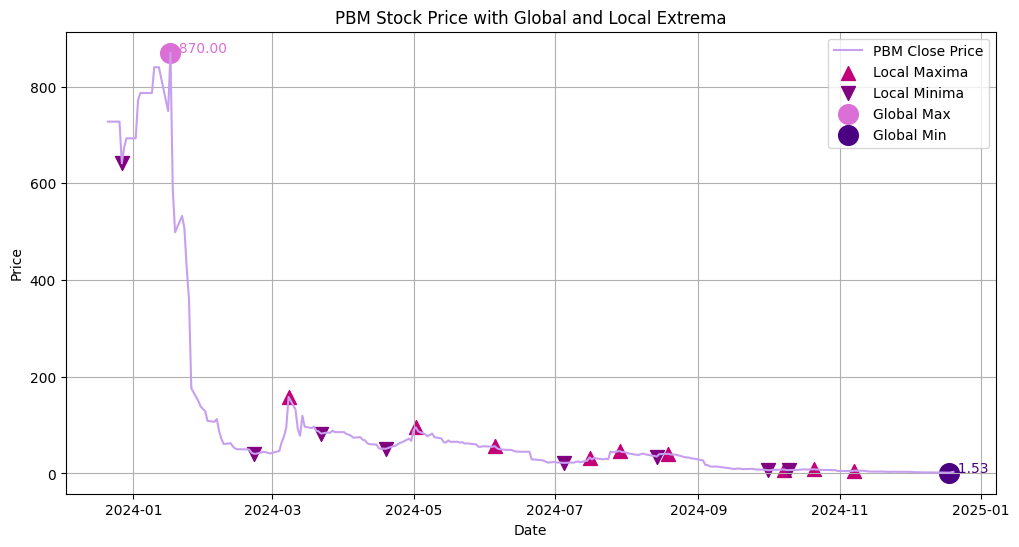


SRM:
Local Maxima Count: 15
Local Minima Count: 16


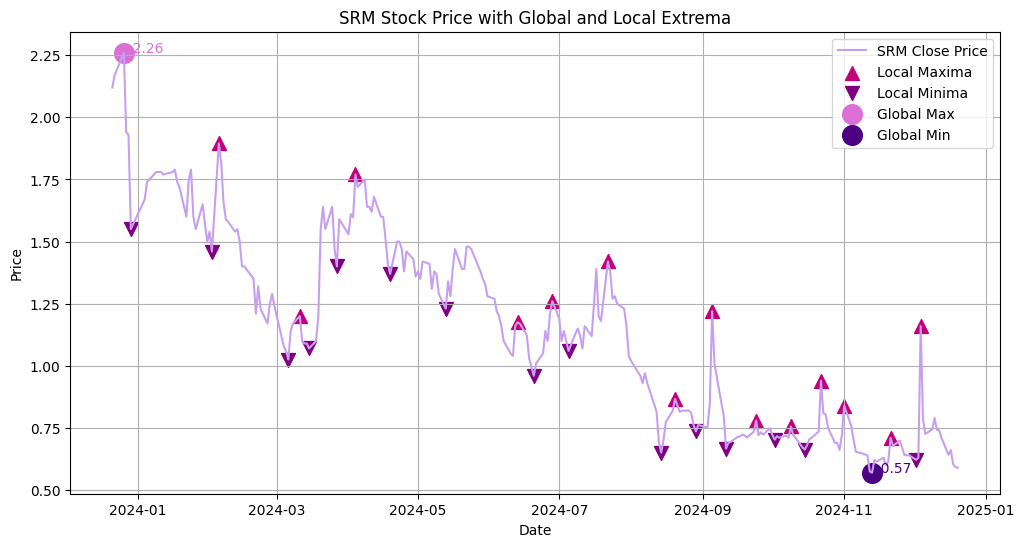


NTRP:
Local Maxima Count: 15
Local Minima Count: 17


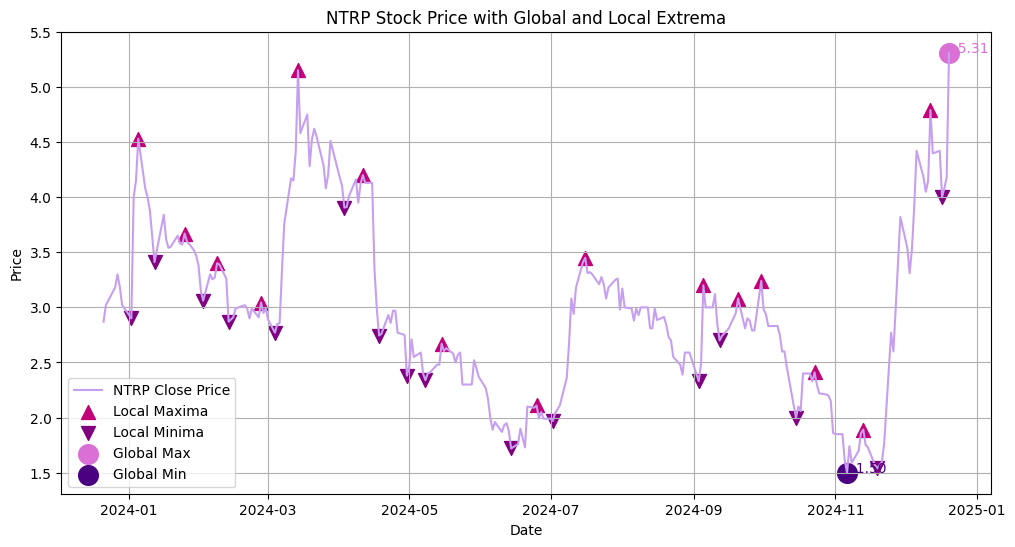


ENTO:
Local Maxima Count: 14
Local Minima Count: 11


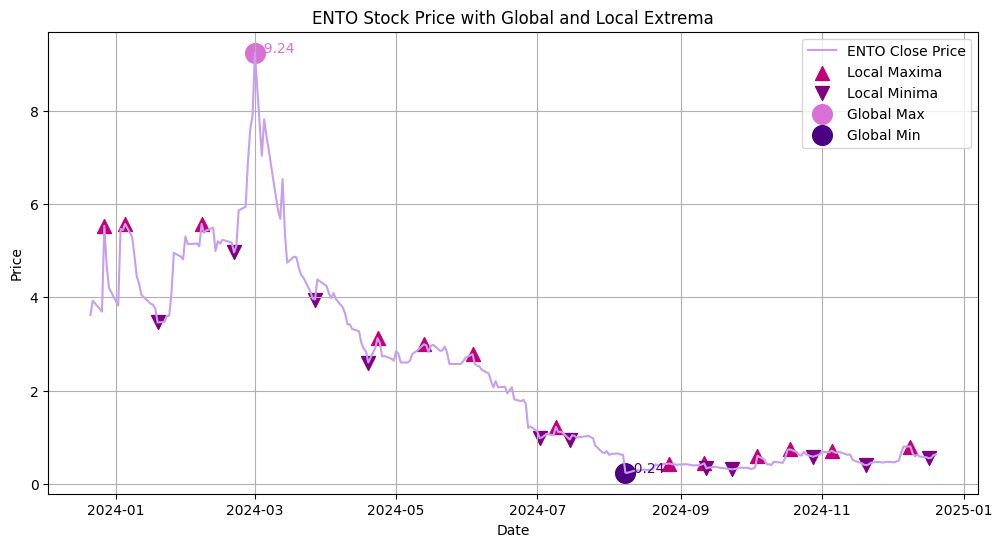


CRKN:
Local Maxima Count: 11
Local Minima Count: 13


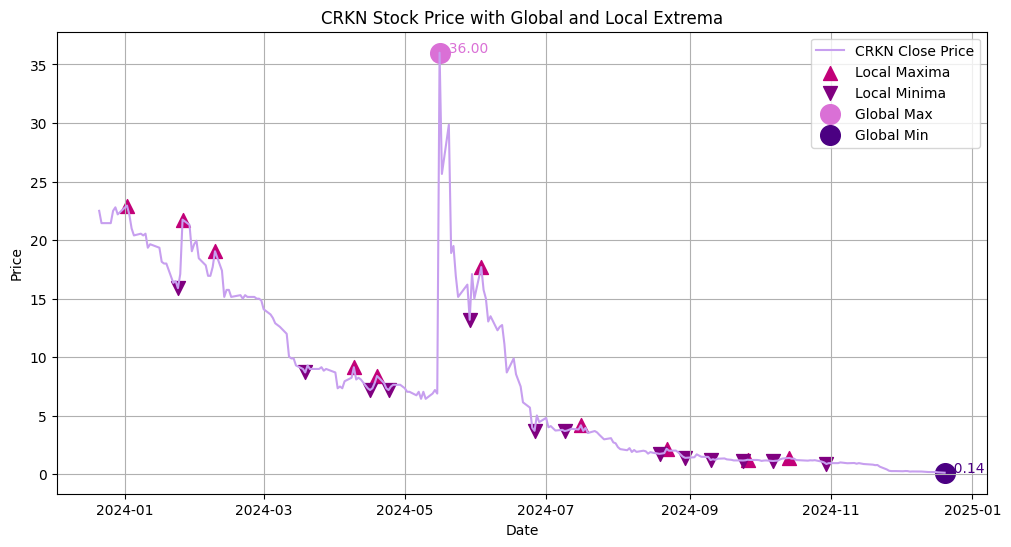


JZXN:
Local Maxima Count: 12
Local Minima Count: 15


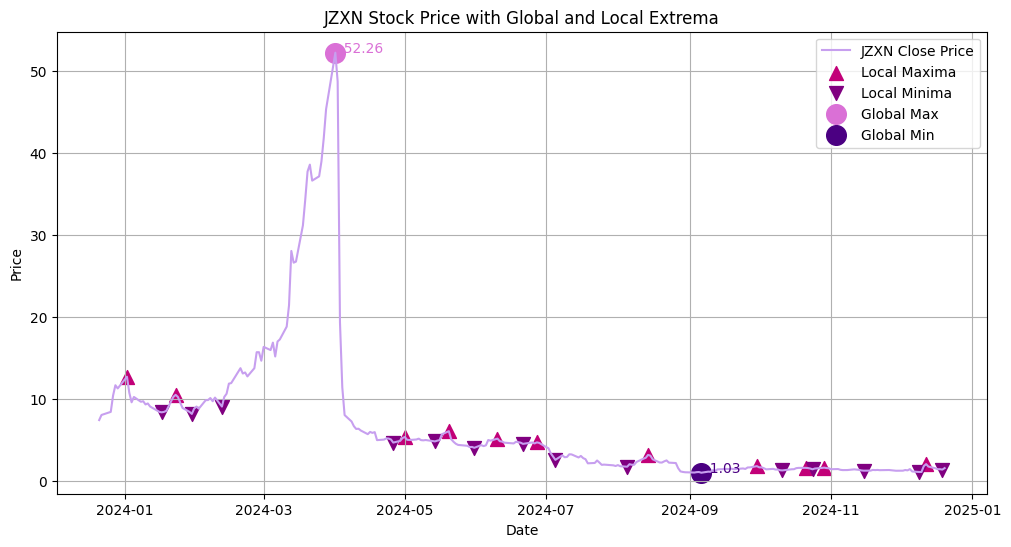


ABP:
Local Maxima Count: 7
Local Minima Count: 8


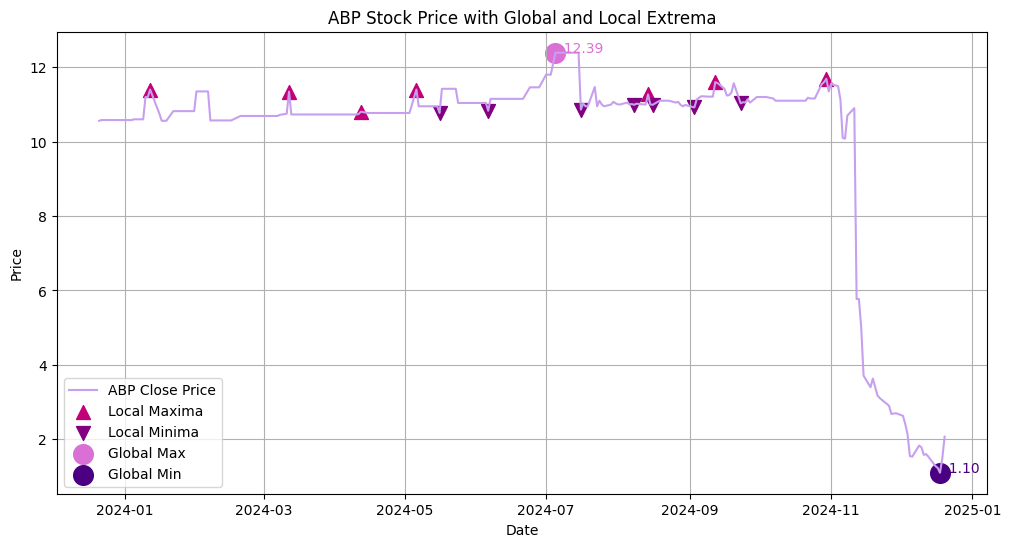


Comparison of Local Extrema and Overall Scores:
       Local Maxima  Local Minima  Overall Score
AAPL             13            15             28
MSFT             14            13             27
GOOGL            15            13             28
TSLA             15            18             33
NVDA             13            14             27
AMD              15            17             32
AMZN             12            15             27
NFLX             16            14             30
INTC             17            16             33
XOM              17            15             32
CVX              16            15             31
OXY              15            17             32
MRNA             15            14             29
PFE              17            11             28
BIIB             17            12             29
GME              15            16             31
AMC              17            15             32
BB               16            13             29
PLUG             14 

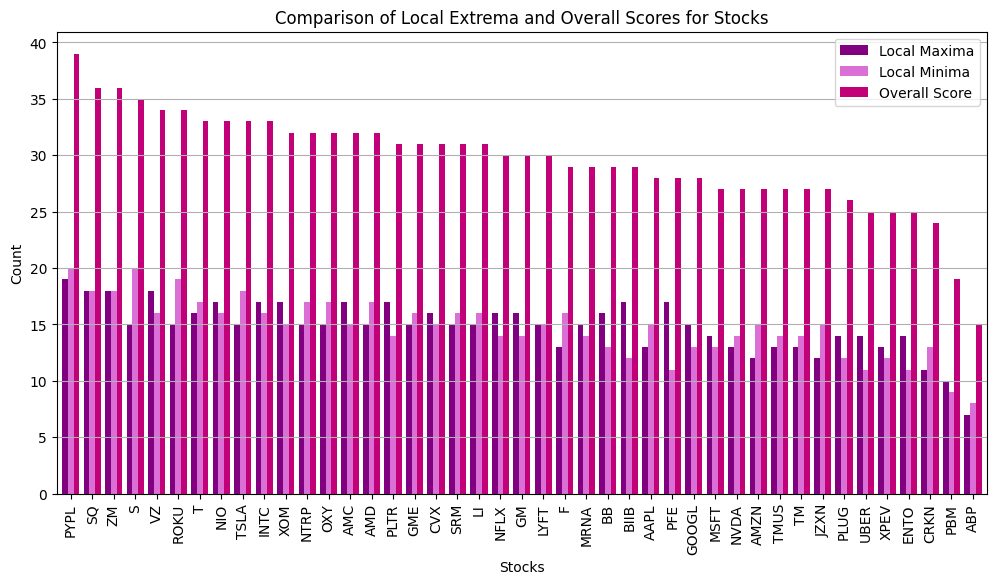

In [64]:
#tickers = ['AAPL', 'MSFT', 'GOOGL']
tickers = ['AAPL', 'MSFT', 'GOOGL', 'TSLA', 'NVDA', 'AMD', 'AMZN', 'NFLX', 'INTC', 'XOM', 'CVX', 'OXY', 'MRNA', 'PFE', 'BIIB', 'GME', 'AMC', 'BB', 'PLUG', 'PLTR', 'ROKU', 'ZM', 'SQ', 'PYPL', 'UBER', 'LYFT', 'T', 'VZ', 'TMUS', 'S', 'TM', 'F', 'GM', 'NIO', 'LI', 'XPEV', 'PBM', 'SRM', 'NTRP', 'ENTO', 'CRKN', 'JZXN', 'ABP']
analyze_stocks(tickers, interval='1d', period='1y', order=5)

In [97]:
def plot_detailed_stock_data(data, extrema, ticker, column='Close'):
    """
    Plot stock price data with extrema at a daily interval, showing the date on the x-axis.
    Args:
        data (pandas.DataFrame): Stock data.
        extrema (dict): Dictionary of extrema indices and values.
        ticker (str): Stock ticker symbol.
        column (str): Column to plot.
    """
    plt.figure(figsize=(100, 6))  # Adjusted figure size for better daily detail
    plt.plot(data[column], label=f'{ticker} Close Price', color='xkcd:lavender')

    # Map extrema indices to actual dates
    dates = data.index
    local_max_dates = dates[extrema['local_maxima']]
    local_min_dates = dates[extrema['local_minima']]

    global_max, max_value = extrema['global_max']
    global_min, min_value = extrema['global_min']

    # Plot local maxima and minima
    plt.scatter(local_max_dates, data[column].iloc[extrema['local_maxima']],
                color='xkcd:magenta', label='Local Maxima', marker='^', s=100)
    plt.scatter(local_min_dates, data[column].iloc[extrema['local_minima']],
                color='purple', label='Local Minima', marker='v', s=100)
    plt.scatter(global_max, max_value,
                color='orchid', label='Global Max', s=200)
    plt.scatter(global_min, min_value,
                color='indigo', label='Global Min', s=200)
    plt.text(global_max, max_value, f'  {max_value:.2f}',
             color='orchid')
    plt.text(global_min, min_value, f'  {min_value:.2f}',
             color='indigo', fontsize=10)

    # Format x-axis for daily intervals
    plt.title(f'{ticker} Stock Price with Global and Local Extrema')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid()

    # Set daily ticks and format them
    ax = plt.gca()
    ax.xaxis.set_major_locator(mdates.DayLocator())  # Set daily intervals
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format as YYYY-MM-DD

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [95]:
def detailed_analyze_stocks(tickers, interval='1d', period='1y', order=5):
    """
    Analyze multiple stocks for local minima and maxima.
    """
    # fetching the stock data of multiple stocks
    stock_data = get_stock_data(tickers, interval, period)
    
    # analyze each stock
    results = {}
    for ticker, data in stock_data.items():
        extrema = find_extrema(data, order=order)
        extrema['overall_score'] = extrema['count_maxima'] + extrema['count_minima']
        results[ticker] = extrema
        print(f"\n{ticker}:")
        print(f"Local Maxima Count: {extrema['count_maxima']}")
        print(f"Local Minima Count: {extrema['count_minima']}")
        
        plot_detailed_stock_data(data, extrema, ticker)


^IXIC:
Local Maxima Count: 14
Local Minima Count: 18


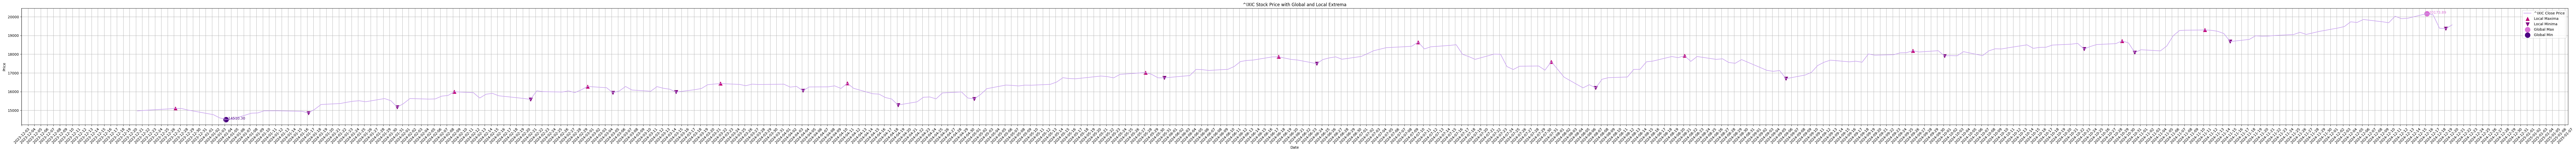

In [98]:
ticker2=['^IXIC']
detailed_analyze_stocks(ticker2)